<a href="https://colab.research.google.com/github/kocelifk/HR-Analytics/blob/main/IBM_HR_Analytics_Employee_Attrition_%26_Performance_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Kaggle IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)
Predict attrition of your valuable employees

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition (1).csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Target Variable:** Attrition

### EDA

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
display(df.iloc[0]) #first row

Age                                      41
Attrition                               Yes
BusinessTravel                Travel_Rarely
DailyRate                              1102
Department                            Sales
DistanceFromHome                          1
Education                                 2
EducationField                Life Sciences
EmployeeCount                             1
EmployeeNumber                            1
EnvironmentSatisfaction                   2
Gender                               Female
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           4
MaritalStatus                        Single
MonthlyIncome                          5993
MonthlyRate                           19479
NumCompaniesWorked                        8
Over18                                    Y
OverTime                        

In [ ]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.width',1000)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00"
mean,36.92,802.49,9.19,2.91,1.00,"1,024.87",2.72,65.89,2.73,2.06,2.73,"6,502.93","14,313.10",2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,"4,707.96","7,117.79",2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,"1,009.00","2,094.00",0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,"2,911.00","8,047.00",1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,"1,020.50",3.00,66.00,3.00,2.00,3.00,"4,919.00","14,235.50",2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,"1,157.00",14.00,4.00,1.00,"1,555.75",4.00,83.75,3.00,3.00,4.00,"8,379.00","20,461.50",4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,"1,499.00",29.00,5.00,1.00,"2,068.00",4.00,100.00,4.00,5.00,4.00,"19,999.00","26,999.00",9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,"1,470.00",36.92,9.14,18.00,30.00,36.00,43.00,60.00
DailyRate,"1,470.00",802.49,403.51,102.00,465.00,802.00,"1,157.00","1,499.00"
DistanceFromHome,"1,470.00",9.19,8.11,1.00,2.00,7.00,14.00,29.00
Education,"1,470.00",2.91,1.02,1.00,2.00,3.00,4.00,5.00
EmployeeCount,"1,470.00",1.00,0.00,1.00,1.00,1.00,1.00,1.00
EmployeeNumber,"1,470.00","1,024.87",602.02,1.00,491.25,"1,020.50","1,555.75","2,068.00"
EnvironmentSatisfaction,"1,470.00",2.72,1.09,1.00,2.00,3.00,4.00,4.00
HourlyRate,"1,470.00",65.89,20.33,30.00,48.00,66.00,83.75,100.00
JobInvolvement,"1,470.00",2.73,0.71,1.00,2.00,3.00,3.00,4.00
JobLevel,"1,470.00",2.06,1.11,1.00,1.00,2.00,3.00,5.00


**EmployeeCount** --> 45.PNG

All values of column 1. This information is useless. The column must be dropped.


**EmployeeNumber** --> Sequential count. This information is useless. The column must be dropped. 

**StandardHours** --> All value of column 80. This information is useless. The column must be dropped. 78.PNG

In [ ]:
num_col=list(df.describe().columns)
num_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
cat_col = list(set(df.columns).difference(num_col))
cat_col

['OverTime',
 'Department',
 'MaritalStatus',
 'JobRole',
 'BusinessTravel',
 'Over18',
 'EducationField',
 'Gender',
 'Attrition']

In [ ]:
remove_list = ['EmployeeCount', 'EmployeeNumber', 'StandardHours']
col_num_numeric = [e for e in num_col if e not in remove_list]
col_num_numeric

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
#Different method to determine categorical columns
cat_col_v2 = []
for k, v in df.iteritems():
  if v.dtype == 'object':
    cat_col_v2.append(k)
cat_col_v2

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [ ]:
print(len(num_col))
print(len(col_num_numeric))
print(len(cat_col))

26
23
9


In [ ]:
df[col_num_numeric].corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.00,0.01,-0.00,0.21,0.01,0.02,0.03,0.51,-0.00,0.50,0.03,0.30,0.00,0.00,0.05,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20
DailyRate,0.01,1.00,-0.00,-0.02,0.02,0.02,0.05,0.00,0.03,0.01,-0.03,0.04,0.02,0.00,0.01,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03
DistanceFromHome,-0.00,-0.00,1.00,0.02,-0.02,0.03,0.01,0.01,-0.00,-0.02,0.03,-0.03,0.04,0.03,0.01,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
Education,0.21,-0.02,0.02,1.00,-0.03,0.02,0.04,0.10,-0.01,0.09,-0.03,0.13,-0.01,-0.02,-0.01,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
EnvironmentSatisfaction,0.01,0.02,-0.02,-0.03,1.00,-0.05,-0.01,0.00,-0.01,-0.01,0.04,0.01,-0.03,-0.03,0.01,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00
HourlyRate,0.02,0.02,0.03,0.02,-0.05,1.00,0.04,-0.03,-0.07,-0.02,-0.02,0.02,-0.01,-0.00,0.00,0.05,-0.00,-0.01,-0.00,-0.02,-0.02,-0.03,-0.02
JobInvolvement,0.03,0.05,0.01,0.04,-0.01,0.04,1.00,-0.01,-0.02,-0.02,-0.02,0.02,-0.02,-0.03,0.03,0.02,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03
JobLevel,0.51,0.00,0.01,0.10,0.00,-0.03,-0.01,1.00,-0.00,0.95,0.04,0.14,-0.03,-0.02,0.02,0.01,0.78,-0.02,0.04,0.53,0.39,0.35,0.38
JobSatisfaction,-0.00,0.03,-0.00,-0.01,-0.01,-0.07,-0.02,-0.00,1.00,-0.01,0.00,-0.06,0.02,0.00,-0.01,0.01,-0.02,-0.01,-0.02,-0.00,-0.00,-0.02,-0.03
MonthlyIncome,0.50,0.01,-0.02,0.09,-0.01,-0.02,-0.02,0.95,-0.01,1.00,0.03,0.15,-0.03,-0.02,0.03,0.01,0.77,-0.02,0.03,0.51,0.36,0.34,0.34


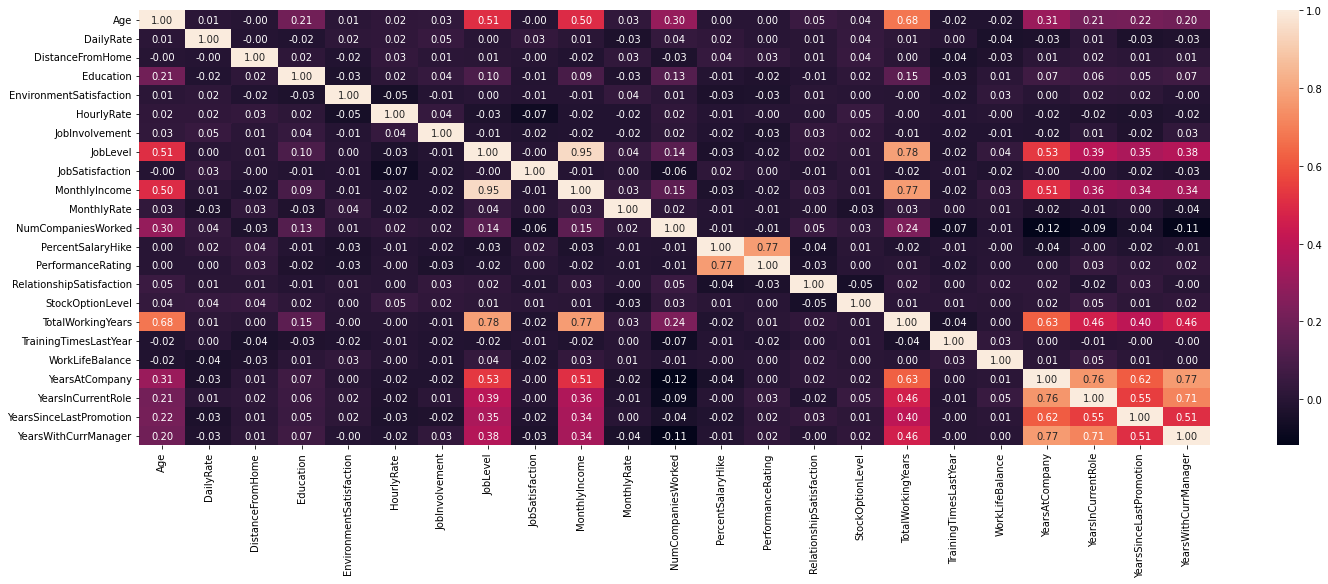

In [ ]:
plt.figure(figsize=(24,8))
sns.heatmap(df[col_num_numeric].corr(), annot=True, fmt=".2f")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


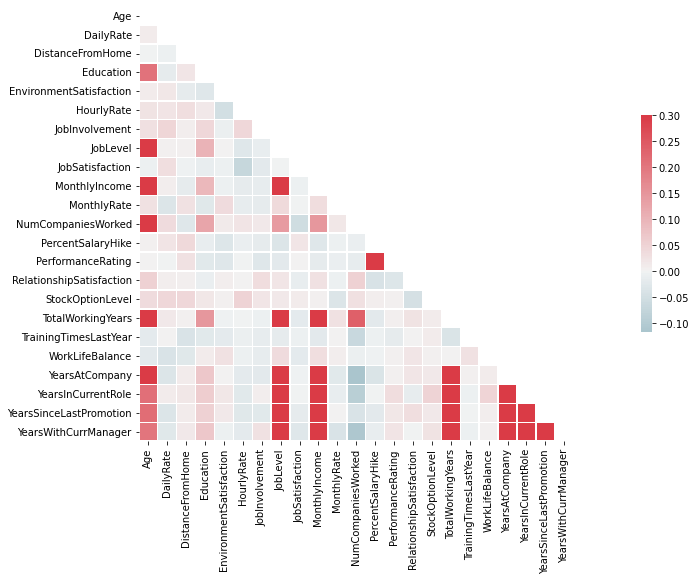

In [ ]:
plt.figure(figsize=(24,8))

mask = np.zeros_like(df[col_num_numeric].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[col_num_numeric].corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidth=.5, cbar_kws={"shrink": .5});

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


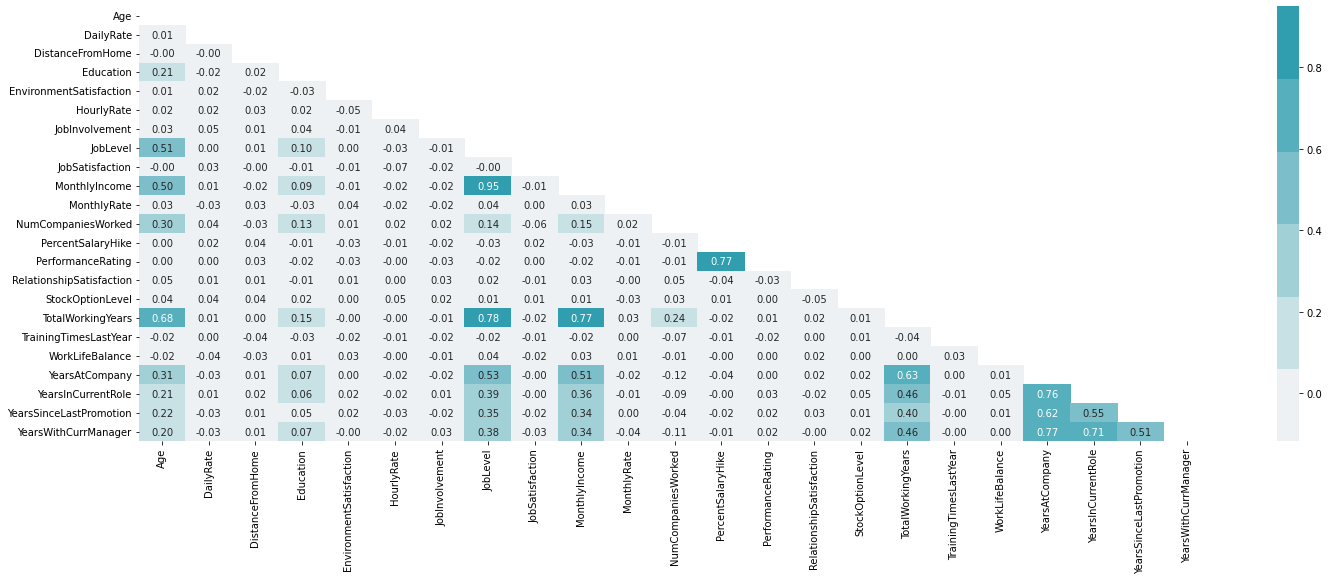

In [ ]:
plt.figure(figsize= (24,8))

mask=np.zeros_like(df[col_num_numeric].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] =True

cmap=sns.light_palette((210,90,60), input = "husl")
sns.heatmap(df[col_num_numeric].corr(), mask=mask, cmap=cmap, annot=True, fmt=".2f")

*There are points to be considered in the correlation matrix.* I used 0.7 as threshold. Those with a value higher than 0.7 will say they have a high correlation. This is purely my personal opinion.


* MonthlyIncome-JobLevel
* TotalWorkingYears-JobLevel
* TotalWorkingYears-MonthlyIncome
* PerformanceRating-PercentSalaryHike
* YearsInCurrentRole-YearsArCompany
* YearsWithCurrManager-YearsInCurrentRole



In [ ]:
df['Attrition'].unique() #Target Variable

array(['Yes', 'No'], dtype=object)

In [ ]:
attrition_to_num = {'Yes': 0, 'No': 1}
df['Attrition_Numerical'] = df['Attrition'].map(attrition_to_num)
df['Attrition_Numerical'].unique()

array([0, 1])

In [ ]:
cat_col

['OverTime',
 'Department',
 'MaritalStatus',
 'JobRole',
 'BusinessTravel',
 'Over18',
 'EducationField',
 'Gender',
 'Attrition']

In [ ]:
cat_col.remove('Attrition')
cat_col

['OverTime',
 'Department',
 'MaritalStatus',
 'JobRole',
 'BusinessTravel',
 'Over18',
 'EducationField',
 'Gender']

In [ ]:
#We need to numerically express categorical variables that have two or more classes.

df_cat = pd.get_dummies(df[cat_col])
df_cat.head()

#We need to pass the categorical columns through the label encoder or one hot encoder. The get_dummies method is used to perform label encoding and one hot encoder at the same time.

,OverTime_No,OverTime_Yes,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Over18_Y,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male
0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
2,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1
3,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0
4,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1


Note! ✈The get_dummies method converts only categorical variables, even if numeric variables are given as arguments.


In [ ]:
X=pd.concat([df[col_num_numeric], df_cat], axis=1)
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime_No,OverTime_Yes,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Over18_Y,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1


In [ ]:
y=df["Attrition_Numerical"]
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Attrition_Numerical, dtype: int64

In [ ]:
y.value_counts()

1    1233
0     237
Name: Attrition_Numerical, dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

### Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
accuracy_score(y_train, clf.predict(X_train))

1.0

In [ ]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       988

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



In [ ]:
confusion_matrix(y_train, clf.predict(X_train))

array([[188,   0],
       [  0, 988]])

In [ ]:
accuracy_score(y_test, clf.predict(X_test))

0.7721088435374149

In [ ]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.31      0.31      0.31        49
           1       0.86      0.87      0.86       245

    accuracy                           0.77       294
   macro avg       0.59      0.59      0.59       294
weighted avg       0.77      0.77      0.77       294



In [ ]:
confusion_matrix(y_test, clf.predict(X_test))

array([[ 15,  34],
       [ 33, 212]])